In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load the LTE KPI Excel file
df = pd.read_excel(r'C:\Users\ezagrri\LearnBay\datasets\LTE_KPI_DATA.xlsx')


# Drop rows where needed columns are missing
df = df.dropna(subset=['E_4G_Downlink IP Throughput(Mbps)', 'Sector'])


In [19]:
# Convert throughput column to numeric
df['E_4G_Downlink IP Throughput(Mbps)'] = pd.to_numeric(df['E_4G_Downlink IP Throughput(Mbps)'], errors='coerce')
df = df.dropna(subset=['E_4G_Downlink IP Throughput(Mbps)'])
df.head(10)

,Sector,Site ID,Index,Start Time,End Time,Query Granularity,Subnetwork,Subnetwork Name,ManagedElement,ManagedElement Name,...,[LTE]Average PHY DL Throughput(Mbps),[LTE]Maximum PHY UL Throughput(Mbps),[LTE]Minimum PHY UL Throughput(Mbps),[LTE]Average PHY UL Throughput(Mbps),E_4G_RRC Drop Rate,E_4G_E-RAB Drop Rate,E_4G_Downlink IP Throughput(Mbps),E_4G_DL PRB Utilization Rate,Cell DL Traffic(MByte),Data Integrity
0,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,5.1070,4.7671,0.0488,0.8055,0.0008,0.0000,3.3748,0.6028,1889.9612,1.0
1,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.0066,4.7030,0.0003,0.3598,0.0014,0.0000,3.2924,0.4199,732.5299,1.0
2,1432A SEC 3,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.5850,2.2280,0.0000,0.4007,0.0000,0.0000,7.7894,0.1003,202.0574,1.0
3,1432A SEC 4,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,0.8774,1.2475,0.0000,0.0675,0.0000,0.0000,21.2716,0.0931,345.3261,1.0
4,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,22.0502,21.8013,2.5141,5.3262,0.0009,0.0001,0.7956,0.9818,8253.9837,1.0
5,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.5804,9.2878,0.0030,0.5908,0.0004,0.0006,9.0803,0.2040,949.5160,1.0
6,1432A SEC 3,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,4.3238,3.7616,0.0036,0.6286,0.0016,0.0017,9.1184,0.2788,1661.2424,1.0
7,1432A SEC 4,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,9.3113,40.4924,0.1192,1.7502,0.0003,0.0004,7.4910,0.4840,3491.2886,1.0
8,1432A SEC 1,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,14.3584,23.6669,0.4421,2.8189,0.0005,0.0000,2.7324,0.7485,5155.8077,1.0
9,1432A SEC 2,1432A,NaN,02/18/21 00:00,2021-02-18 01:00:00,1Hour(s),2002,Subnet(MO SDR)(2002),23401,1432A-SDR-009_E_PROJECT_ADDSEC2_GL18L26L9(23401),...,2.5649,1.8412,0.0000,0.2643,0.0072,0.0009,9.2469,0.2164,926.4011,1.0


In [20]:
# Group by Sector for ANOVA test #this gives list of arrays
grouped_data = [group["E_4G_Downlink IP Throughput(Mbps)"].values for name, group in df.groupby("Sector")]
print (grouped_data)

[array([3.3748, 0.7956, 2.7324, ..., 3.3355, 2.4225, 1.6467]), array([ 3.2924,  9.0803,  9.2469, ..., 10.1905,  1.5434,  9.2642]), array([ 7.7894,  9.1184, 12.7761, ...,  4.2161,  4.6292,  3.3481]), array([21.2716,  7.491 ,  8.2597, ...,  3.9135, 14.6745,  4.8519])]


In [21]:
# Run One-Way ANOVA
f_stat, p_value = f_oneway(*grouped_data)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)


ANOVA F-statistic: 155.35654972809178
ANOVA p-value: 1.649129038797842e-95


In [ ]:
#This strongly indicates that there are statistically significant differences in downlink throughput among the sectors. 
#In other words, at least one sector's average throughput is significantly different from the others.

In [22]:
# Rename for formula readability
df = df.rename(columns={'E_4G_Downlink IP Throughput(Mbps)': 'Throughput'})

In [23]:
# 1. Perform ANOVA using statsmodels
# ----------------------------
model = ols('Throughput ~ Sector', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:\n", anova_table)


ANOVA Table:
                  sum_sq      df          F        PR(>F)
Sector     27666.081024     3.0  155.35655  1.649129e-95
Residual  250500.889999  4220.0        NaN           NaN


In [24]:
# Run Tukey HSD Test
tukey = pairwise_tukeyhsd(endog=df['Throughput'],
                          groups=df['Sector'],
                          alpha=0.05)
print(tukey.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
1432A SEC 1 1432A SEC 2   5.5147    0.0   4.653  6.3765   True
1432A SEC 1 1432A SEC 3   3.9888    0.0  3.1271  4.8506   True
1432A SEC 1 1432A SEC 4    6.816    0.0  5.9543  7.6777   True
1432A SEC 2 1432A SEC 3  -1.5259    0.0 -2.3876 -0.6642   True
1432A SEC 2 1432A SEC 4   1.3013 0.0006  0.4395   2.163   True
1432A SEC 3 1432A SEC 4   2.8272    0.0  1.9655  3.6889   True
--------------------------------------------------------------


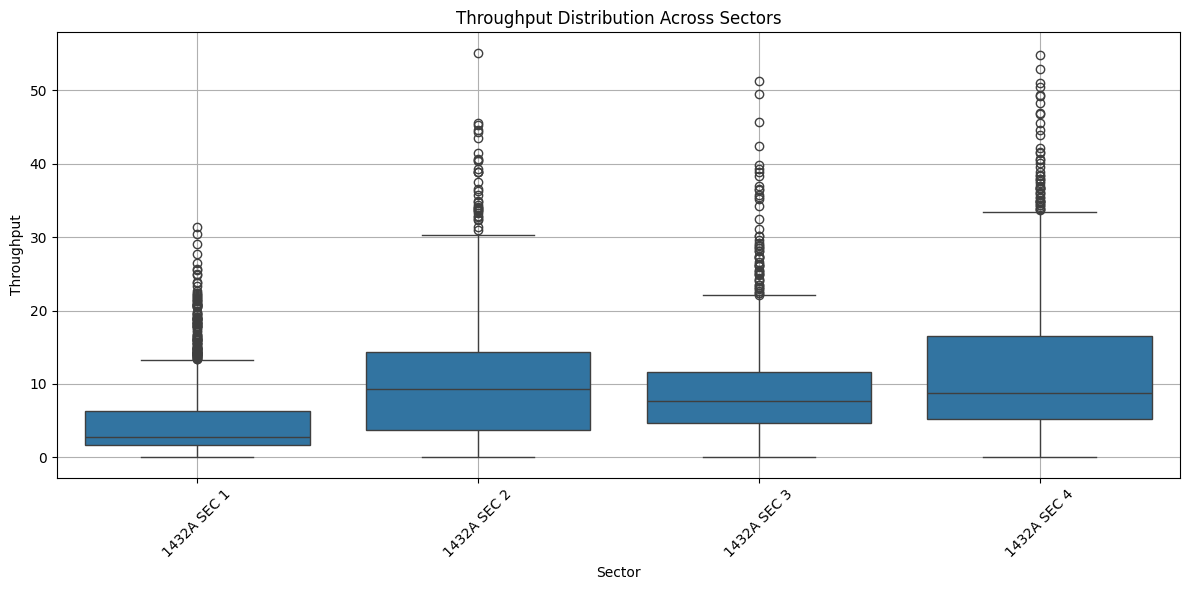

In [25]:
# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sector', y='Throughput')
plt.title("Throughput Distribution Across Sectors")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
sector_stats = df.groupby('Sector')['Throughput'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print(sector_stats)

                  mean   median  count
Sector                                
1432A SEC 4  12.007283  8.72405   1056
1432A SEC 2  10.706002  9.29835   1056
1432A SEC 3   9.180094  7.61520   1056
1432A SEC 1   5.191270  2.81755   1056


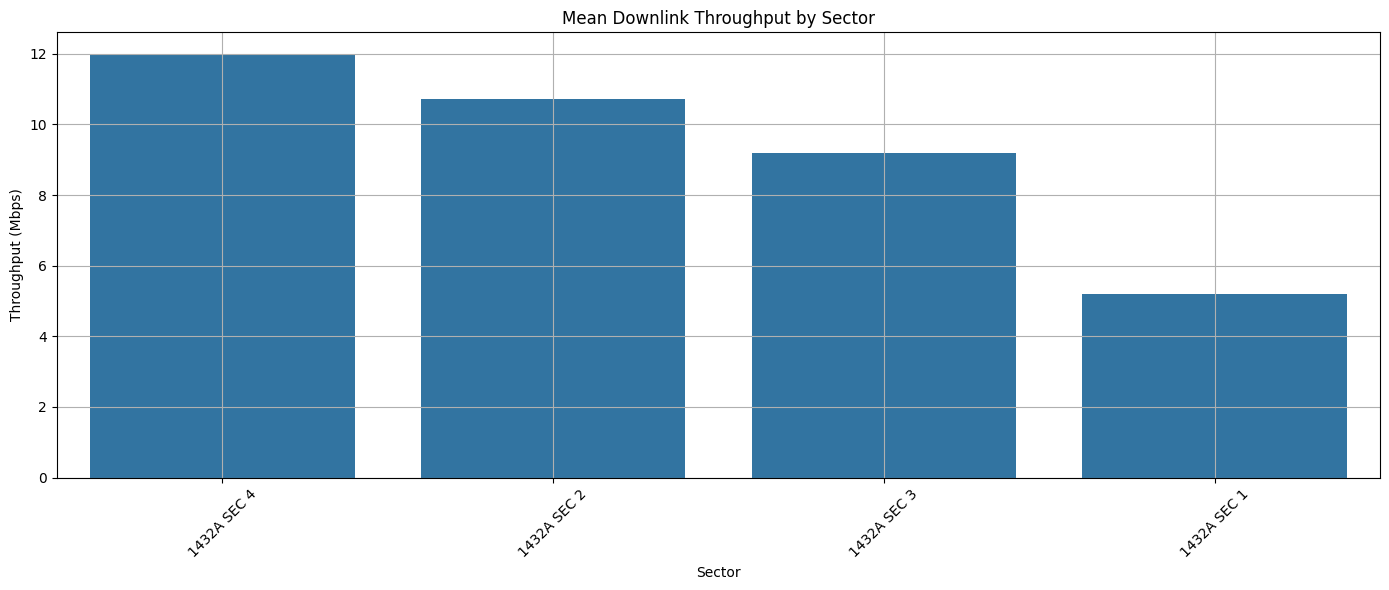

In [27]:
plt.figure(figsize=(14, 6))
sns.barplot(x=sector_stats.index, y=sector_stats['mean'])
plt.xticks(rotation=45)
plt.title("Mean Downlink Throughput by Sector")
plt.ylabel("Throughput (Mbps)")
plt.grid(True)
plt.tight_layout()
plt.show()